Calendar_Listing and Sent_Review

Connecting to Google Drive and obtaining the raw data of reviews

In [1]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mplleaflet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import glob
import os
from datetime import date
today = date.today()
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
import io
import requests
from unidecode import unidecode
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from textblob import TextBlob
import mplleaflet
from tqdm import tqdm
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from functools import reduce

Downloaded and stored Calendar.csv in Dataframe

In [4]:
cal_df = pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/RawDataset/calendar.csv')
# Dataset is now stored in a Pandas Dataframe

Downloaded and stored Listing.csv in Dataframe

In [5]:
list_df = pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/RawDataset/listings.csv')
# Dataset is now stored in a Pandas Dataframe

In [6]:
cal_df.shape

(1971365, 7)

In [7]:
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2021-11-04,f,$59.00,$59.00,3,1125
1,522471,2021-11-04,f,$180.00,$180.00,5,1125
2,522471,2021-11-05,f,$180.00,$180.00,5,1125
3,522471,2021-11-06,f,$180.00,$180.00,5,1125
4,522471,2021-11-07,f,$180.00,$180.00,5,1125


In [8]:
list_df.shape

(5402, 74)

In [9]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211104024252,2021-11-04,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211104024252,2021-11-04,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.57
2,27886,https://www.airbnb.com/rooms/27886,20211104024252,2021-11-04,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.13
3,28871,https://www.airbnb.com/rooms/28871,20211104024252,2021-11-04,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.62
4,29051,https://www.airbnb.com/rooms/29051,20211104024252,2021-11-04,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.90,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.52


Dropping Any NULL values from cal_df dataframe

In [10]:
cal_df.dropna(how = 'any', axis = 0,inplace=True)
cal_df.shape

(1971365, 7)

Filtering only for Booked Listings

In [11]:
cal_reduced=cal_df.loc[cal_df['available'] == 'f']
cal_reduced.shape

(1412328, 7)

In [12]:
cal_reduced.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

Dropping Unnnecessary Columns having Majority of NULL vales from list_df

In [13]:
list_df['neighbourhood_group_cleansed'].isnull().sum()

5402

In [14]:
list_df.drop('neighbourhood_group_cleansed',axis=1,inplace=True)

In [15]:
list_df['host_acceptance_rate'].isnull().sum()

1505

In [16]:
list_df.drop('host_acceptance_rate',axis=1,inplace=True)

In [17]:
list_clean = ['name','host_since','listing_url', 'scrape_id', 'last_scraped', 'description', 'neighborhood_overview','picture_url', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications','first_review','last_review', 'calendar_updated','calendar_last_scraped']
list_clean_df = list_df.drop(list_clean, axis=1)

In [18]:
list_clean_df.isna().sum()

id                                                 0
host_id                                            0
host_response_time                              1760
host_response_rate                              1760
host_is_superhost                                  1
host_listings_count                                1
host_total_listings_count                          1
host_has_profile_pic                               1
host_identity_verified                             1
neighbourhood                                   1494
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                       5402
bathrooms_text                                    14
bedrooms                                      

In [19]:
list_clean_df.drop (['license','bathrooms'], axis=1, inplace=True)

In [20]:
print(sum((list_clean_df.host_listings_count == list_clean_df.host_total_listings_count) == False))

1


In [21]:
list_clean_df.loc[((list_clean_df.host_listings_count == list_clean_df.host_total_listings_count) == False)][:5]

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4683,46502181,5619022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,4.93,4.57,f,1,0,1,0,3.65


In [22]:
# Looking at the dataset, the vales in host_listings_count and host_total_listings_count is same except for 32 NULL values
# The calculated fields are correlated to above 2 columns
# So we can drop one column 'host_total_listings_count'
list_clean_df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [23]:
sum((list_clean_df.minimum_nights == list_clean_df.minimum_minimum_nights) == False)

395

In [24]:
list_clean_df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [25]:
list_clean_df.shape

(5402, 39)

In [26]:
list_clean_df.isnull().sum()

id                                0
host_id                           0
host_response_time             1760
host_response_rate             1760
host_is_superhost                 1
host_listings_count               1
host_has_profile_pic              1
host_identity_verified            1
neighbourhood                  1494
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   14
bedrooms                        321
beds                            239
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews           

Merging Calendar and Listing

In [27]:
cal_reduced = cal_reduced.rename(columns={'listing_id':'id'})
merge_df = pd.merge(list_clean_df,cal_reduced, on ='id')
merge_df.shape

(1412328, 45)

In [28]:
merge_df.head(5)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y
0,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,4.68,4.81,t,2.83,2021-11-04,f,$59.00,$59.00,3,1125
1,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,4.68,4.81,t,2.83,2021-11-08,f,$59.00,$59.00,3,1125
2,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,4.68,4.81,t,2.83,2021-11-09,f,$59.00,$59.00,3,1125
3,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,4.68,4.81,t,2.83,2021-11-10,f,$59.00,$59.00,3,1125
4,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,4.68,4.81,t,2.83,2021-11-11,f,$59.00,$59.00,3,1125


Checking Dupicate pair of listing ID and Price_y

In [29]:
temp=[]
for index, row in merge_df.iterrows():
    temp.append(str(row['id'])+row['price_y'])

In [30]:
x = np.array(temp) 
print(len(np.unique(x)))

33851


In [31]:
merge_df['pair']=pd.Series(temp)
#merge_df.assign(key=1)
print(merge_df[['id', 'price_y', 'pair']].head(10))

     id price_y        pair
0  2818  $59.00  2818$59.00
1  2818  $59.00  2818$59.00
2  2818  $59.00  2818$59.00
3  2818  $59.00  2818$59.00
4  2818  $59.00  2818$59.00
5  2818  $59.00  2818$59.00
6  2818  $59.00  2818$59.00
7  2818  $59.00  2818$59.00
8  2818  $59.00  2818$59.00
9  2818  $59.00  2818$59.00


Dropping Duplicate Values of pair column

In [32]:
join_df = merge_df.drop_duplicates(subset='pair', keep='first')
join_df.drop('pair',axis=1,inplace=True)
join_df.shape

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(33851, 45)

In [33]:
join_df.shape

(33851, 45)

Merging Sentiment Score of Reviews with Calendar and Listing

In [34]:
concise_review=pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/sent_review.csv')
concise_review = concise_review.rename(columns = {'listing_id' : 'id'})
clean_df = pd.merge(join_df, concise_review, on = 'id')
clean_df.shape

(29842, 47)

In [35]:
clean_df.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,instant_bookable,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-11-04,f,$59.00,$59.00,3,1125,0.383577,239
1,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-02,f,$69.00,$69.00,3,1125,0.383577,239
2,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-28,f,$61.00,$61.00,3,1125,0.383577,239
3,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-30,f,$65.00,$65.00,3,1125,0.383577,239
4,2818,3159,within an hour,100%,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-31,f,$63.00,$63.00,3,1125,0.383577,239


In [36]:
clean_df.columns

Index(['id', 'host_id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price_x',
       'minimum_nights_x', 'maximum_nights_x', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'date', 'available', 'price_y', 'adjusted_price',
       'minimum_nights_y', 'maximum_nights_y', 'Mean_Sent_Pol',
       'Total_Review_By_Listin

Handling NULL vales in clean_df(Calendar+Listing+Sentiment_Reviews)

In [37]:
# Handling Null Values in different columns
clean_df.host_has_profile_pic = clean_df.host_has_profile_pic.fillna('f')
clean_df.host_is_superhost = clean_df.host_is_superhost.fillna('Null')
clean_df.host_identity_verified = clean_df.host_identity_verified.fillna('Null')
clean_df.neighbourhood = clean_df.neighbourhood.fillna('Null')
clean_df.reviews_per_month = clean_df.reviews_per_month.fillna('0')
clean_df.property_type=clean_df.property_type.fillna('Null')

Replacing Special Characters in Columns of clean_df

In [38]:
clean_df = clean_df.rename(columns = {'listing_id' : 'id'})
clean_df['host_response_rate'] = clean_df['host_response_rate'].apply(lambda x : float(str(x).replace('%', '')) / 100)
clean_df['price_x'] = clean_df['price_x'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
clean_df['price_y'] = clean_df['price_y'].apply(lambda x : float(x.replace('$', '').replace(',', '')))
clean_df['adjusted_price'] = clean_df['adjusted_price'].apply(lambda x : float(x.replace('$', '').replace(',', '')))

In [39]:
clean_df.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,instant_bookable,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-11-04,f,59.0,59.0,3,1125,0.383577,239
1,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-02,f,69.0,69.0,3,1125,0.383577,239
2,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-28,f,61.0,61.0,3,1125,0.383577,239
3,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-30,f,65.0,65.0,3,1125,0.383577,239
4,2818,3159,within an hour,1.0,t,1.0,t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,...,t,2.83,2021-12-31,f,63.0,63.0,3,1125,0.383577,239


In [40]:
export_csv = clean_df.to_csv ('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/Merged_Clean.csv', index = None, header=True)

Encoding Categorical Variables using LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
clean_df['host_is_superhost'] = LabelEncoder().fit_transform(clean_df.host_is_superhost)
clean_df['host_response_time'] = LabelEncoder().fit_transform(clean_df.host_response_time)
clean_df['host_has_profile_pic'] = LabelEncoder().fit_transform(clean_df.host_has_profile_pic)
clean_df['host_identity_verified'] = LabelEncoder().fit_transform(clean_df.host_identity_verified)
clean_df['neighbourhood'] = LabelEncoder().fit_transform(clean_df.neighbourhood)
clean_df['neighbourhood_cleansed'] = LabelEncoder().fit_transform(clean_df.neighbourhood_cleansed)
clean_df['property_type'] = LabelEncoder().fit_transform(clean_df.property_type)
clean_df['room_type'] = LabelEncoder().fit_transform(clean_df.room_type)
clean_df['beds'] = LabelEncoder().fit_transform(clean_df.beds)
clean_df['has_availability'] = LabelEncoder().fit_transform(clean_df.has_availability)
clean_df['instant_bookable'] = LabelEncoder().fit_transform(clean_df.instant_bookable)

Taking only Numeric Columns

In [42]:
s_columns = [col for col in clean_df.columns if clean_df[col].dtype == 'float64' or clean_df[col].dtype == 'int64']
clean_numeric = clean_df[s_columns]

In [43]:
clean_numeric.shape

(29842, 33)

In [44]:
clean_numeric.head()

,id,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price_x,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
0,2818,3159,1.0,1.0,52.36435,4.94358,2,1.0,1,59.0,...,4.98,4.68,4.81,2.83,59.0,59.0,3,1125,0.383577,239
1,2818,3159,1.0,1.0,52.36435,4.94358,2,1.0,1,59.0,...,4.98,4.68,4.81,2.83,69.0,69.0,3,1125,0.383577,239
2,2818,3159,1.0,1.0,52.36435,4.94358,2,1.0,1,59.0,...,4.98,4.68,4.81,2.83,61.0,61.0,3,1125,0.383577,239
3,2818,3159,1.0,1.0,52.36435,4.94358,2,1.0,1,59.0,...,4.98,4.68,4.81,2.83,65.0,65.0,3,1125,0.383577,239
4,2818,3159,1.0,1.0,52.36435,4.94358,2,1.0,1,59.0,...,4.98,4.68,4.81,2.83,63.0,63.0,3,1125,0.383577,239


Checking if the columns in clean_numeric have NULL values

In [45]:
clean_numeric.columns[clean_numeric.isnull().any()]

Index(['host_response_rate', 'host_listings_count', 'bedrooms',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [46]:
clean_numeric.isnull().sum()

id                                0
host_id                           0
host_response_rate             6324
host_listings_count              15
latitude                          0
longitude                         0
accommodates                      0
bedrooms                       1869
beds                              0
price_x                           0
minimum_nights_x                  0
maximum_nights_x                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
review_scores_accuracy           18
review_scores_cleanliness        18
review_scores_checkin            18
review_scores_communication      18
review_scores_location           18
review_scores_value              18
reviews_per_month                 0
price_y                     

In [47]:
fill_median = lambda col : col.fillna(col.median())
clean_numeric = clean_numeric.apply(fill_median, axis = 0)

In [48]:
clean_numeric.columns[clean_numeric.isnull().any()]

Index([], dtype='object')

In [49]:
clean_numeric.shape

(29842, 33)

In [50]:
from sklearn.utils import shuffle
clean_numeric = shuffle(clean_numeric)

In [51]:
clean_numeric.to_csv ('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/Clean_Numeric.csv', index = None, header=True)
clean_numeric_backup = clean_numeric

Testing the Linear Regressiion, Random Forest and XGBoost Models with all Features

In [52]:
def train_test_id(id_lst, test_portion = 0.3):
    """
        Randomly split training and test id.
        Input: 
            id_lst is the list of all ids
        return:
            train_id_list, test_id_list
    """
    id_set = set(id_lst)
    size = len(id_set)
    test_set = set()
    while True:
        if np.random.rand() <= 0.5:
            test_set.add(id_set.pop())
        if len(test_set) >= test_portion * size:
            break
    return id_set, test_set

In [53]:
def search_params(params, estimator, X, y, cv = 5):
    """
        Search optimal hyper-parameters for estimator.
    """
    clf = GridSearchCV(estimator, params, cv = cv, scoring = 'neg_mean_squared_error', verbose = 2)
    clf.fit(X, y)
    return clf.best_params_

def cal_rmse(y_pred, y_true):
    """
        calculate root mean square error based on predicted and true result.
    """
    return np.sqrt(np.sum((y_pred - y_true)**2 / len(y_pred)))

In [54]:
def visualize_pred(y_pred, y_test, model_name):
    """
        Visualize predicted result for 100 randomly selected samples
    """
    # vis_lst = [i for i in range(len(y_pred))]
    # np.random.shuffle(vis_lst)
    # y_test = y_test.reset_index()

    fig, ax = mp.subplots(figsize=(12,3))
    ax.set(xlabel='Samples', ylabel='Prices',
           title='Comparison between True and Predicted Price for Airbnb in Amsterdam using ' + model_name )
    ax.plot(range(len(y_pred[:100])),y_pred[:100])
    ax.plot(range(len(y_test[:100])),y_test[:100])
    ax.legend(('predicted price', 'true price'),
               loc='upper left')
    mp.show()

In [55]:
X, Y = clean_numeric.loc[:,clean_numeric.columns != 'price_x'], clean_numeric['price_x']

In [56]:
train_id, test_id = train_test_id(clean_numeric['id'].unique())

#Generate training_entries and test_entries:
train_entries = list(tqdm(map(lambda x : x in train_id, clean_numeric['id'])))
test_entries = list(tqdm(map(lambda x : x in test_id, clean_numeric['id'])))

X_train, X_test, y_train, y_test = X[train_entries], X[test_entries], \
                                   Y[train_entries], Y[test_entries]

29842it [00:00, 1492795.45it/s]
29842it [00:00, 1750652.75it/s]


In [57]:
X_train

,id,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights_x,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
7614,14561871,4473053,1.00,1.0,52.35320,4.925050,4,2.0,2,4,...,5.00,4.50,5.00,0.07,164.0,164.0,4,14,0.381482,3
1844,2882337,922459,1.00,1.0,52.37292,4.820300,4,2.0,1,2,...,5.00,5.00,5.00,0.11,203.0,203.0,2,1125,0.212136,2
775,1018703,125667,1.00,2.0,52.35099,4.886627,2,1.0,0,2,...,4.83,4.76,4.57,2.75,105.0,89.0,1,1124,0.423965,206
1354,1927634,9314105,1.00,1.0,52.36807,4.934490,4,3.0,1,5,...,4.97,4.61,4.69,0.43,265.0,265.0,5,1125,0.385904,28
4073,6675077,24927522,0.92,1.0,52.35613,4.888630,2,1.0,0,1,...,4.90,4.88,4.49,0.81,163.0,163.0,1,1125,0.433621,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,15159146,1826139,1.00,8.0,52.37956,4.894530,6,2.0,2,7,...,4.98,4.96,4.69,14.21,265.0,239.0,5,1124,0.454482,43
11849,22183604,15216760,1.00,2.0,52.37363,4.880940,2,2.0,1,2,...,5.00,5.00,5.00,0.28,201.0,201.0,2,1125,0.415698,5
4691,7924857,23387617,1.00,1.0,52.36935,4.867480,6,4.0,4,2,...,4.93,4.78,4.66,0.80,425.0,425.0,2,1125,0.495860,44
16643,30553701,229196646,0.91,6.0,52.35930,4.926740,4,2.0,1,1,...,3.50,4.50,3.33,1.18,295.0,295.0,1,99,0.108228,5


In [58]:
print(np.std(y_train))
print(np.std(y_test))

87.62002357286028
86.95748213707878


Linear Regression

RMSE =  65.77618895653174


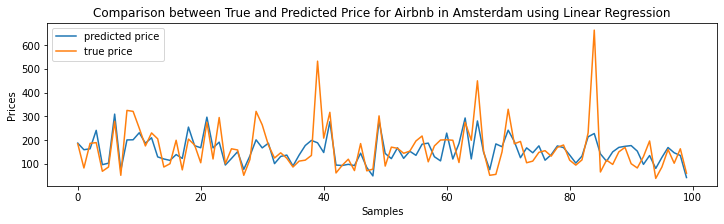

In [59]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_ams = regr.predict(X_test)
rmse = cal_rmse(y_pred_ams, y_test)
print('RMSE = ',rmse)
visualize_pred(y_pred_ams, y_test,'Linear Regression')

Random Forest

RMSE =  44.10934307750449


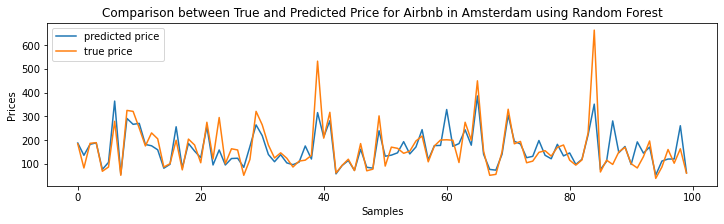

In [60]:
from sklearn.ensemble import RandomForestRegressor

ams_opt_params = {'max_depth' : 10, 'n_estimators' : 100, 'random_state' : 0}
regr = RandomForestRegressor(**ams_opt_params)
regr.fit(X_train, y_train)

y_pred_ams = regr.predict(X_test)
print('RMSE = ',cal_rmse(y_pred_ams, y_test))
visualize_pred(y_pred_ams, y_test,'Random Forest')


XG Boost Regressor

[15:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


42.15594318339008


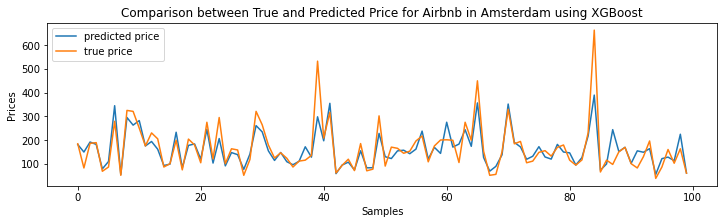

In [61]:
clean_opt_params = {'booster' : 'gbtree', 'max_depth' : 5, 'learning_rate' : 0.1, 'n_estimator' : 100}
xgb_ams = XGBRegressor(**clean_opt_params)
xgb_ams.fit(X_train, y_train, eval_metric = 'rmse')
y_pred_ams = xgb_ams.predict(X_test)
print(cal_rmse(y_pred_ams, y_test))
visualize_pred(y_pred_ams, y_test, 'XGBoost')

In [62]:
print(y_pred_ams)
print(y_pred_ams.shape)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
X.head()

[180.99515  149.2561   191.5621   ...  43.663105  80.71372  240.25551 ]
(9385,)
(20457,)
(20457, 32)
(9385, 32)


,id,host_id,host_response_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights_x,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,Mean_Sent_Pol,Total_Review_By_Listing
24714,44310955,21167882,0.98,34.0,52.35783,4.897860,4,2.0,3,5,...,4.78,4.67,3.78,0.67,217.0,217.0,5,1125,0.199383,3
7614,14561871,4473053,1.00,1.0,52.35320,4.925050,4,2.0,2,4,...,5.00,4.50,5.00,0.07,164.0,164.0,4,14,0.381482,3
1844,2882337,922459,1.00,1.0,52.37292,4.820300,4,2.0,1,2,...,5.00,5.00,5.00,0.11,203.0,203.0,2,1125,0.212136,2
775,1018703,125667,1.00,2.0,52.35099,4.886627,2,1.0,0,2,...,4.83,4.76,4.57,2.75,105.0,89.0,1,1124,0.423965,206
1354,1927634,9314105,1.00,1.0,52.36807,4.934490,4,3.0,1,5,...,4.97,4.61,4.69,0.43,265.0,265.0,5,1125,0.385904,28


In [63]:
def plot_fold_performance(rmse):
    """
        Plot root mean square error based on model validation 
    """
    print('Standard Deviation = ',np.std(rmse))
    fig, ax = mp.subplots(figsize=(12,3))
    ax.set(xlabel='Iterations', ylabel='RMS Error',
    title='Performance of the 4 Folds Validation')
    x= range(len(rmse))
    y=np.around(rmse,decimals= 2)
    ax.plot(x,y)
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    
    mp.show()


[15:34:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE =  90.59557278726909
[15:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE =  91.04789558221904
[15:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parame

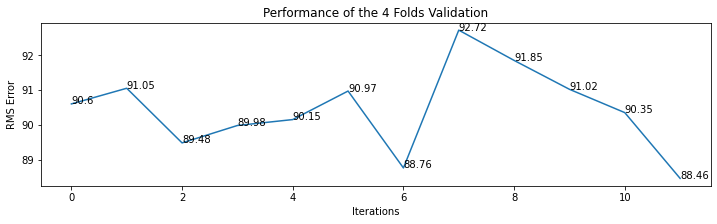

In [64]:
from sklearn.model_selection import RepeatedKFold 
import array
import statistics as st

kf = RepeatedKFold(n_splits=4, n_repeats=3, random_state=None) 
clean_opt_params = {'booster' : 'gbtree', 'max_depth' : 5, 'n_estimator' : 100}
xgb_ams = XGBRegressor(**clean_opt_params)
temp_rmse = array.array('f')
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    xgb_ams.fit(X_train, y_train, eval_metric = 'rmse')
    y_pred_ams = xgb_ams.predict(X_test)
    rmse = cal_rmse(y_pred_ams, y_test)
    temp_rmse.append(rmse)
    print('RMSE = ',rmse)
plot_fold_performance(temp_rmse)

Model Implementation with Selected Features

In [65]:
selected_df=pd.read_csv('D:/DCU/CA660_Stats/Assignment1/Amsterdam_Netherlands/Intermediate/Final_v1.csv')

In [66]:
def cal_rmse1(y_pred, y_true):
    """
        calculate root mean square error based on predicted and true result.
    """
    return np.sqrt(np.sum((y_pred - y_true)**2 / len(y_pred)))

In [67]:
from matplotlib import pyplot as plt
def visualize_pred1(y_pred, y_test,model_name):
    """
        Visualize predicted result for 100 randomly selected samples
    """
    vis_lst = [i for i in range(len(y_pred))]
    np.random.shuffle(vis_lst)
    y_test = y_test.reset_index()

    fig, ax = plt.subplots(figsize=(12,3))
    ax.set(xlabel='Samples', ylabel='Prices',
           title='Comparison of Predicted and Actual Price using Selected Featues using ' + model_name)
    ax.plot(range(len(y_pred[vis_lst[:100]])),y_pred[vis_lst[:100]])
    ax.plot(range(len(y_test.loc[vis_lst[:100], 'price_x'])),y_test.loc[vis_lst[:100], 'price_x'])
    ax.legend(('Predicted price', 'Actual price'),
               loc='upper left')
    ax.grid(),
    plt.show()

In [68]:
### Assigning X and Y for label
selected_df.reset_index(inplace=True)
X, Y = selected_df.loc[:,selected_df.columns != 'price_x'], selected_df['price_x']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [70]:
print(np.std(y_train))
print(np.std(y_test))

87.02720140806004
88.44438079024998


Linear Regression With Selected Features

RMSE =  68.65790782610696


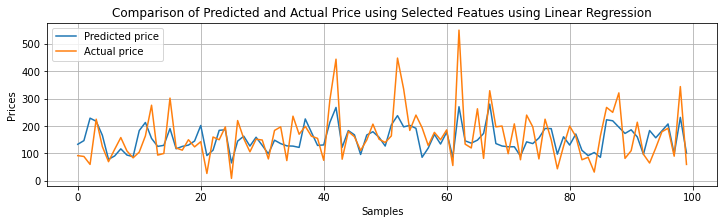

In [71]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_ams = regr.predict(X_test)
rmse = cal_rmse1(y_pred_ams, y_test)
print('RMSE = ',rmse)
visualize_pred1(y_pred_ams, y_test,'Linear Regression')

Random Forest Regressor with Selected Features

RMSE =  72.83305160794505


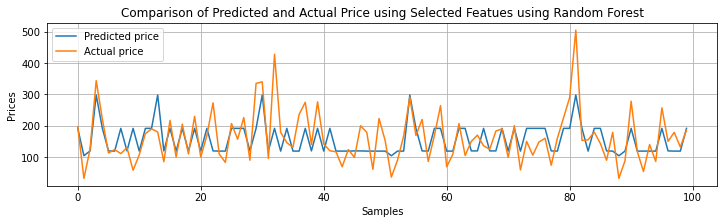

In [72]:
from sklearn.ensemble import RandomForestRegressor

ams_opt_params = {'max_depth' : 2, 'n_estimators' : 100, 'random_state' : 0}
regr = RandomForestRegressor(**ams_opt_params)
regr.fit(X_train, y_train)

y_pred_ams = regr.predict(X_test)
print('RMSE = ',cal_rmse1(y_pred_ams, y_test))
visualize_pred1(y_pred_ams, y_test,'Random Forest')


RMSE =  33.6934576350901


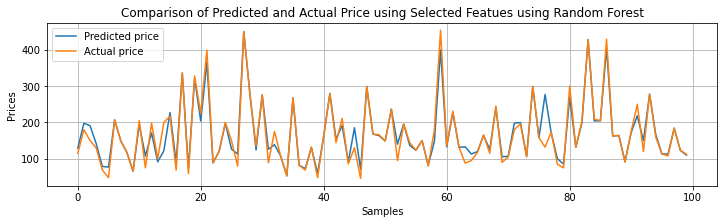

In [73]:
from sklearn.ensemble import RandomForestRegressor

ams_opt_params = {'max_depth' : 15, 'n_estimators' : 100, 'random_state' : 0}
regr = RandomForestRegressor(**ams_opt_params)
regr.fit(X_train, y_train)

y_pred_ams = regr.predict(X_test)
print('RMSE = ',cal_rmse1(y_pred_ams, y_test))
visualize_pred1(y_pred_ams, y_test,'Random Forest')


XG Boost Regressor with Selected Features

[15:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


29.99667312006926


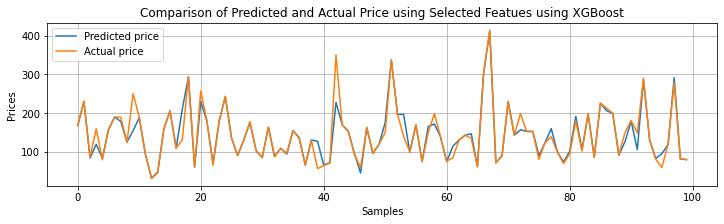

In [74]:
clean_opt_params = {'booster' : 'gbtree', 'max_depth' : 15, 'learning_rate' : 0.1, 'n_estimator' : 100}
xgb_ams = XGBRegressor(**clean_opt_params)
xgb_ams.fit(X_train, y_train, eval_metric = 'rmse')
y_pred_ams = xgb_ams.predict(X_test)
print(cal_rmse(y_pred_ams, y_test))
visualize_pred1(y_pred_ams, y_test, 'XGBoost')

In [75]:
def plot_fold_performance1(rmse):
    """
        Plot root mean square error based on model validation 
    """
    print('Standard Deviation = ',np.std(rmse))
    fig, ax = mp.subplots(figsize=(12,3))
    ax.set(xlabel='Iterations', ylabel='RMS Error',
    title='Performance of the 4 Folds Validation')
    x= range(len(rmse))
    y=np.around(rmse,decimals= 2)
    ax.plot(x,y)
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j))
    
    mp.show()


[15:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE =  30.612453000398293
[15:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE =  29.82316089890551
[15:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Param

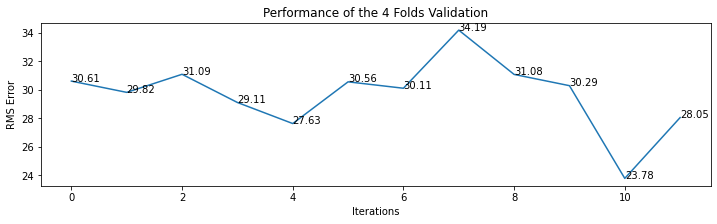

In [76]:
from sklearn.model_selection import RepeatedKFold 
import array
import statistics as st

kf = RepeatedKFold(n_splits=4, n_repeats=3, random_state=None) 
clean_opt_params = {'booster' : 'gbtree', 'max_depth' : 15, 'n_estimator' :100}
xgb_ams = XGBRegressor(**clean_opt_params)
temp_rmse = array.array('f')
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    xgb_ams.fit(X_train, y_train, eval_metric = 'rmse')
    y_pred_ams = xgb_ams.predict(X_test)
    rmse = cal_rmse(y_pred_ams, y_test)
    temp_rmse.append(rmse)
    print('RMSE = ',rmse)
plot_fold_performance1(temp_rmse)